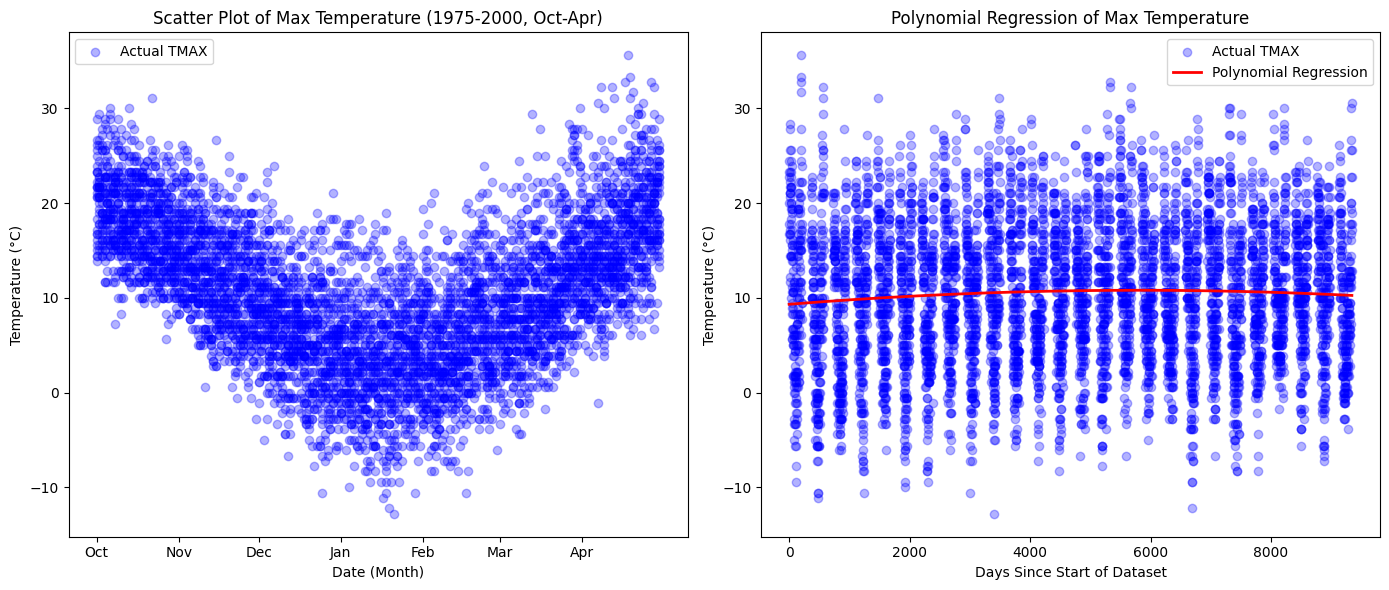

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# Read the data
df = pd.read_csv('New_York/temperature_data.csv')

# Convert 'DATE' to datetime
df['DATE'] = pd.to_datetime(df['DATE'])

# Extract year, month, and month-day for consistent plotting
df['YEAR'] = df['DATE'].dt.year
df['MONTH'] = df['DATE'].dt.month
df['MONTH_DAY'] = df['DATE'].dt.strftime('%m-%d')

# Adjust the winter season (Oct-Apr belongs to a single winter season)
df['SEASON_YEAR'] = df['YEAR']
df.loc[df['MONTH'] < 10, 'SEASON_YEAR'] -= 1  # Assign Jan-Apr to the previous winter season

# Filter for winter seasons from 1975 to 2000 (Oct 1 - Apr 1)
df_filtered = df[(df['SEASON_YEAR'].between(1975, 2000)) & (df['MONTH'].isin([10, 11, 12, 1, 2, 3, 4]))]

# Convert dates to numerical values (days since the first winter season start)
df_filtered = df_filtered.sort_values('DATE')
df_filtered['days_since_start'] = (df_filtered['DATE'] - df_filtered['DATE'].min()).dt.days

# Prepare data for Polynomial Regression
X = df_filtered[['days_since_start']].values
y = df_filtered['TMAX'].values  # Using TMAX as the target variable

# Polynomial Regression (degree 2)
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X, y)

# Generate predictions
X_pred = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_pred = model.predict(X_pred)

# ----- PLOTTING -----

plt.figure(figsize=(14, 6))

# First Graph: Scatter plot of actual temperatures
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['MONTH_DAY'], df_filtered['TMAX'], color='blue', alpha=0.3, label='Actual TMAX')
plt.xlabel('Date (Month)')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of Max Temperature (1975-2000, Oct-Apr)')
plt.xticks(['10-01', '11-01', '12-01', '01-01', '02-01', '03-01', '04-01'], ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr'])
plt.legend()

# Second Graph: Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['days_since_start'], df_filtered['TMAX'], color='blue', alpha=0.3, label='Actual TMAX')
plt.plot(X_pred, y_pred, color='red', linewidth=2, label='Polynomial Regression')
plt.xlabel('Days Since Start of Dataset')
plt.ylabel('Temperature (°C)')
plt.title('Polynomial Regression of Max Temperature')
plt.legend()

plt.tight_layout()
plt.show()
